<a href="https://colab.research.google.com/github/Manojpatil123/Capstone-project-Supervised_machinelearning_classification_-on_HEALTH-INSURANCE-CROSS-SELL-PREDICTIO/blob/main/HEALTH_INSURANCE_CROSS_SELL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

# Tabel of content 


* __Step 1: Importing the Relevant Libraries__
    
* __Step 2: Data Inspection__
    
* __Step 3: Exploratory Data Analysis__
    
* __Step 4: Feature engineering__
   
* __Step 5: Feature selection__
   
* __Step 6: Train and Test split__
   
* __Step 7: Model training__
   
* __Step 8: Cross validation__

* __Step 9: Model explainability__

* __Step 10: Conclusion__


# Importing the Relevant Libraries

In [ ]:
#!pip install pandas-profiling==2.7.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [188]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Loding dataset to pandas dataframe

In [ ]:
#importing dataset
path='/content/drive/MyDrive/Alma better/Alma better/capstone project/ Supervised ML - Classification/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv'
df=pd.read_csv(path)

In [ ]:
df.head()

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1    Male   44                1         28.0                   0   
1   2    Male   76                1          3.0                   0   
2   3    Male   47                1         28.0                   0   
3   4    Male   21                1         11.0                   1   
4   5  Female   29                1         41.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0   > 2 Years            Yes         40454.0                  26.0      217   
1    1-2 Year             No         33536.0                  26.0      183   
2   > 2 Years            Yes         38294.0                  26.0       27   
3    < 1 Year             No         28619.0                 152.0      203   
4    < 1 Year             No         27496.0                 152.0       39   

   Response  
0         1  
1         0  
2         1  
3         0  
4         0

# Data Inspection

### Checking shape of dataset
The first value in this case reflects the number of data points, and the second value the number of features in the dataset.

In [ ]:
#checking shape of the dataset
df.shape

(381109, 12)

Observation-

There are 12 columns and 381109 rows in our dataset.

### Checking data types of our dataset holds.

In [ ]:
#checking dtypes of data
df.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

Observation-

There are 3 types of dtypes present in our dataset those are int, float and object. 3 features are categorical and remaining are numerical  

### Display the complete summary of the dataset
df.info() gives the summary of the dataframe including data types, shape and memory storage.

In [ ]:
#checking information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


### Checking unique values in our dataset

In [ ]:
#checking unique values of each features
df.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

Observation-

*  Since the values in the Id column are all unique, we may eliminate it because it is not relevant for prediction.

*  We can do the encoding on the Age, Driving License, Previously Insured, Vehicle Age, and Vehicle Damage columns because they only contain two unique values.



### Checking columns in our dataset 

In [ ]:
#checking columns of data
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

### Checking statistics part of our data i.e. mean,standard deviation, and so on
To learn more about the dataset's properties We are making use of the df.describe() function, which by default provides statistical statistics on all numerical aspects in our data frame.

In [ ]:
#checking statistical info of data
df.describe()

id            Age  Driving_License    Region_Code  \
count  381109.000000  381109.000000    381109.000000  381109.000000   
mean   190555.000000      38.822584         0.997869      26.388807   
std    110016.836208      15.511611         0.046110      13.229888   
min         1.000000      20.000000         0.000000       0.000000   
25%     95278.000000      25.000000         1.000000      15.000000   
50%    190555.000000      36.000000         1.000000      28.000000   
75%    285832.000000      49.000000         1.000000      35.000000   
max    381109.000000      85.000000         1.000000      52.000000   

       Previously_Insured  Annual_Premium  Policy_Sales_Channel  \
count       381109.000000   381109.000000         381109.000000   
mean             0.458210    30564.389581            112.034295   
std              0.498251    17213.155057             54.203995   
min              0.000000     2630.000000              1.000000   
25%              0.000000    24405.000000             29.000000   
50%              0.000000    31669.000000            133.000000   
75%              1.000000    39400.000000            152.000000   
max              1.000000   540165.000000            163.000000   

             Vintage       Response  
count  381109.000000  381109.000000  
mean      154.347397       0.122563  
std        83.671304       0.327936  
min        10.000000       0.000000  
25%        82.000000       0.000000  
50%       154.000000       0.000000  
75%       227.000000       0.000000  
max       299.000000       1.000000

### From the statistical part of our data we can observe
* Based on the age feature, we can see that the oldest client with insurance is 85 and the youngest is 20. In terms of age distributions, there are several outliers.
* The customer has been affiliated with the firm for a maximum of 299 days, a minimum of 10, and an average of 154 days.
* Since the maximum premium a client must pay in a year is $5,40,165 and the minimum premium is $2630, we may infer that most consumers are interested in modest premium amounts.

## Categorical features statistics details

With the help of below argument we can mention categorical columns, it will show summary of all the categorical features too.

In [ ]:
df.describe(include='O')

Gender Vehicle_Age Vehicle_Damage
count   381109      381109         381109
unique       2           3              2
top       Male    1-2 Year            Yes
freq    206089      200316         192413

Observation-

* Males in our dataset have a greater count than females.

* In our dataset, the age range of 1-2 year vehicles is greater.

* Many customers' vehicles have been damaged

# Exploratory Data Analysis

### Checking value count of target variable

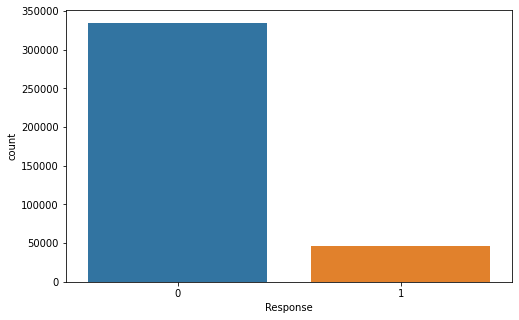

In [ ]:
fig=plt.figure(figsize=(8,5))

sns.countplot(df.Response)

In [ ]:
df.Response.value_counts()/df.shape[0]

0    0.877437
1    0.122563
Name: Response, dtype: float64

Observation-

The dependent variable is binary in nature, with values o and 1. From the preceding plot, we can see that a large number of customers are uninterested in vehicle insurance. Approximately 87.7 percent of the data is 0 and 12.2 percent is 1. Because there is an imbalance in the output feature, the imbalce technique must be used to handle this data.

### Checking distribution of all the features

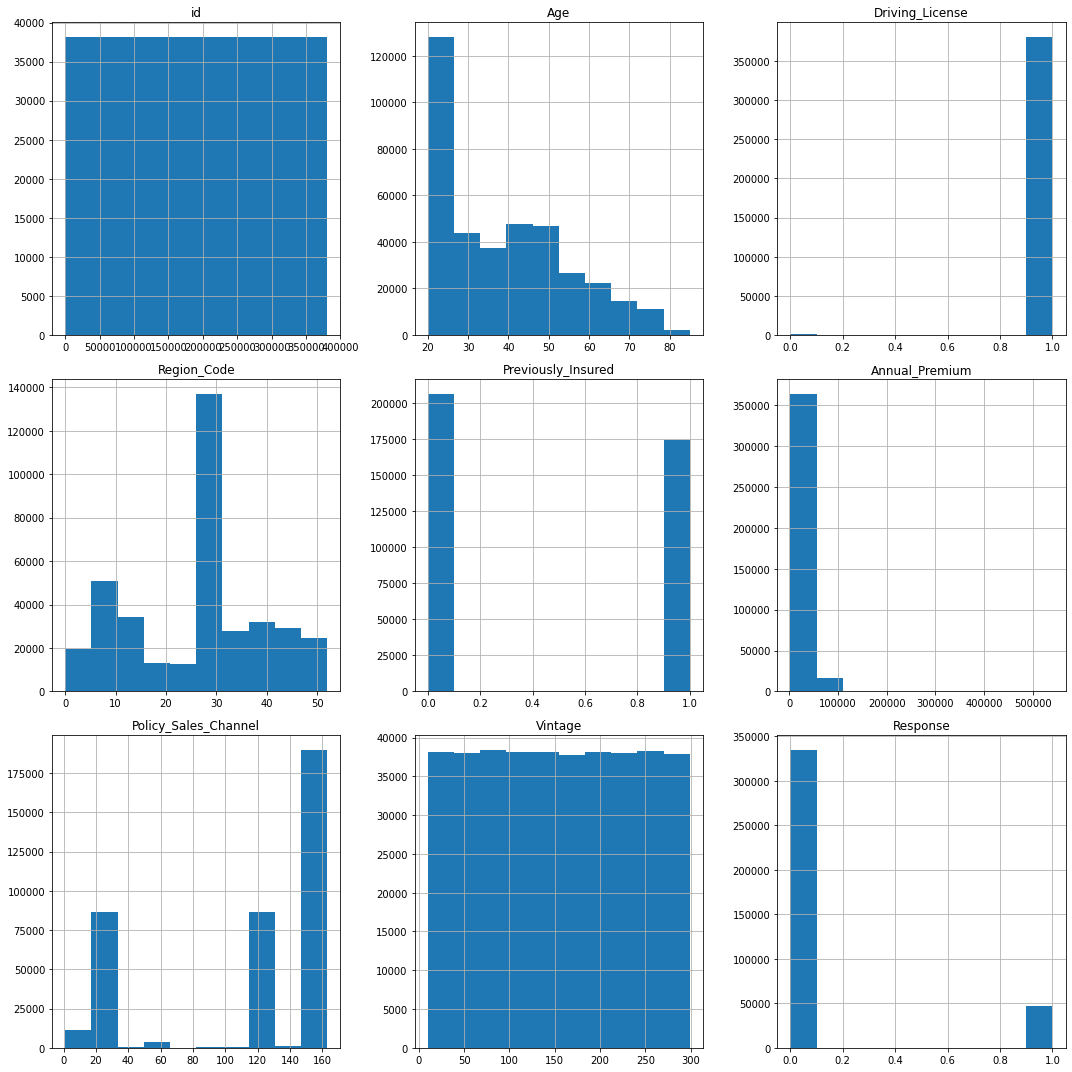

In [ ]:
# Freq distribution of all data
fig, ax = plt.subplots(figsize=(15,15))
pd.DataFrame.hist(data=df,ax=ax)
plt.tight_layout()

In [ ]:
#checking skewness of data
df.skew()

id                      9.443274e-16
Age                     6.725390e-01
Driving_License        -2.159518e+01
Region_Code            -1.152664e-01
Previously_Insured      1.677471e-01
Annual_Premium          1.766087e+00
Policy_Sales_Channel   -9.000081e-01
Vintage                 3.029517e-03
Response                2.301906e+00
dtype: float64

Observation-



### Pandas_Profiling of dataset 

In [ ]:
import pandas_profiling

In [ ]:
df.profile_report() 

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### relationships between each variable

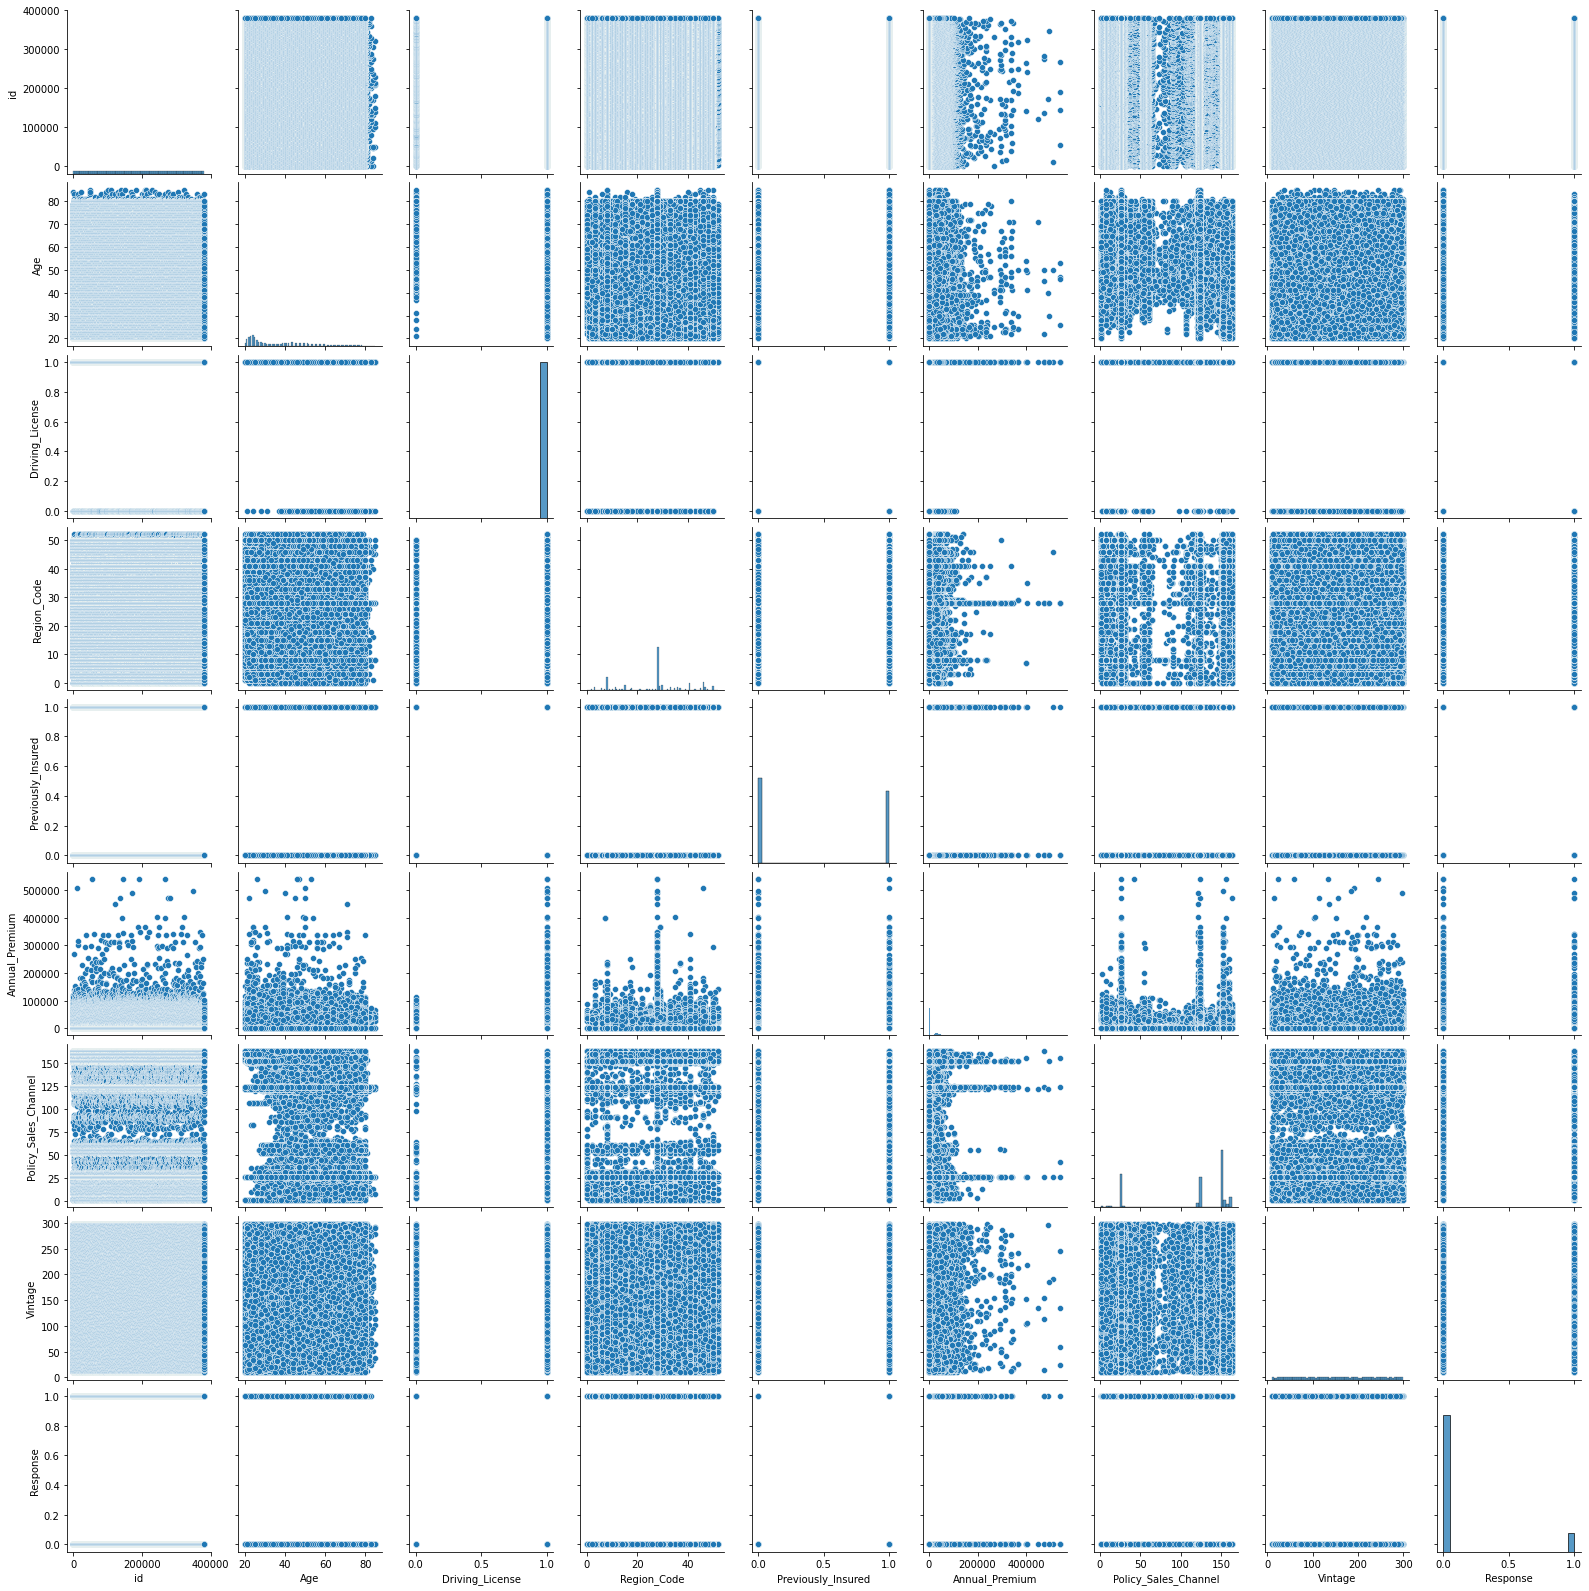

In [ ]:
sns.pairplot(df)

Observation-

From the above plot, we can observe the distribution of each feature with other features. A lot of features have binary values, so for those features we can't see a good relationship with other features. Due to more unique values, some of the features are uniformly distributed. Because the premium feature is skewed to the right, it has a skewed relationship with the other features.

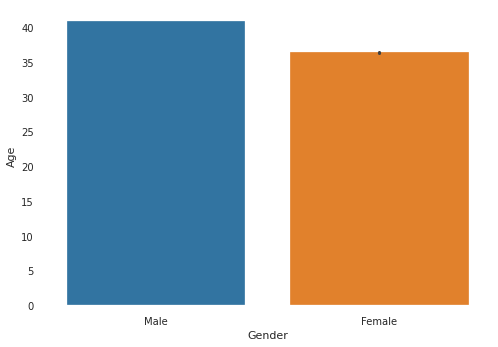

In [ ]:
#checking value count of age with gender
sns.barplot(df.Gender,df.Age)

In [ ]:
abc=df.groupby('Gender')['Age'].mean()
abc

Gender
Female    36.372746
Male      40.903095
Name: Age, dtype: float64

Observation-

In our dataset, male customers' average ages are greater than those of female customers.

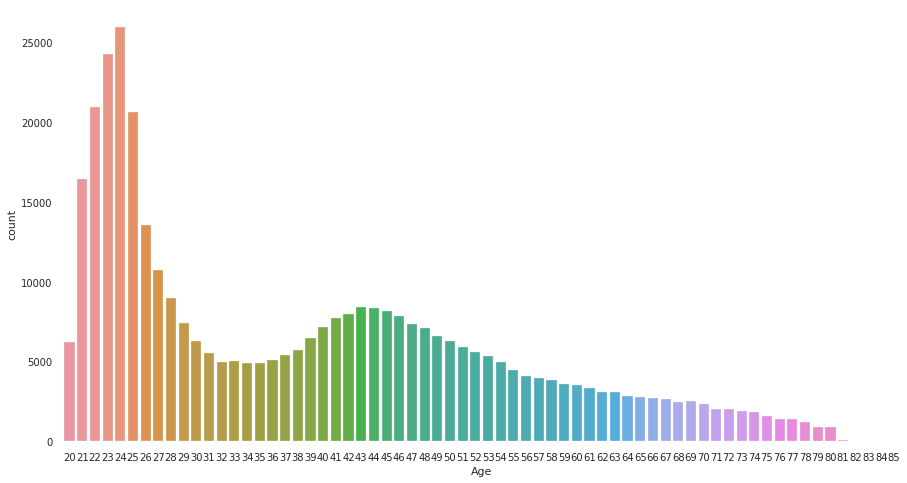

In [ ]:
#cheking value count of age feature
size=plt.figure(figsize=(15,8))
sns.countplot(df.Age)

Observation-

From the above plot, we can observe that the majority of the customers are young, in the range of 20 to 30 years. The second largest age group of customers ranges from 35 to 55 years old.

In [ ]:
abc=df.groupby('Gender')['Driving_License'].sum()
abc

Gender
Female    174808
Male      205489
Name: Driving_License, dtype: int64

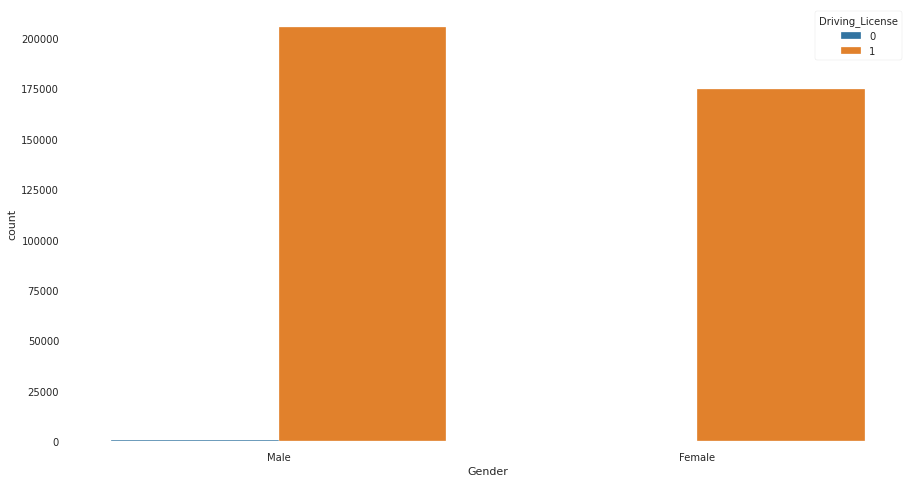

In [ ]:
#cheking value  of gender vs driving license
size=plt.figure(figsize=(15,8))
sns.countplot(df.Gender,hue=df['Driving_License'])

Observation-

From the above graph, we can observe the majority of male customers having driving licences compared to female customers.

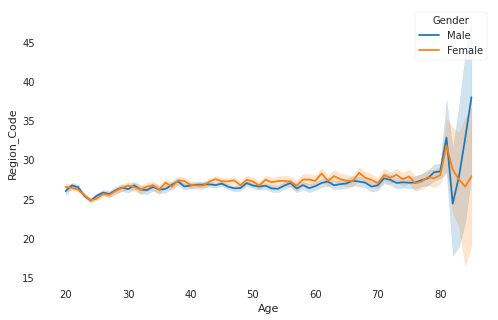

In [ ]:
#cheking value  region code with age
size=plt.figure(figsize=(8,5))
sns.lineplot(df.Age,df.Region_Code, hue=df['Gender'])

Observation-

From the graph we can observe that the majority of customers in the age range of 75 to 85 have a huge variation in region_code.

In [ ]:
abc=df.groupby('Gender')['Previously_Insured'].sum()
abc

Gender
Female    87949
Male      86679
Name: Previously_Insured, dtype: int64

In [ ]:
df.Previously_Insured.value_counts()/df.shape[0]

0    0.54179
1    0.45821
Name: Previously_Insured, dtype: float64

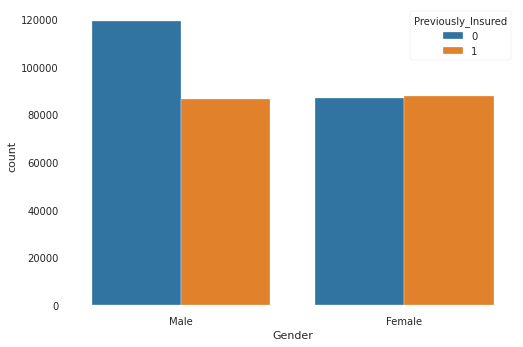

In [ ]:
#Previously_Insured vs gender
sns.countplot(df.Gender, hue=df['Previously_Insured'])

Observation-

From the graph, we can observe that the majority of male customers did not have insurance previously compared to females. 45% of customers who were previously insured

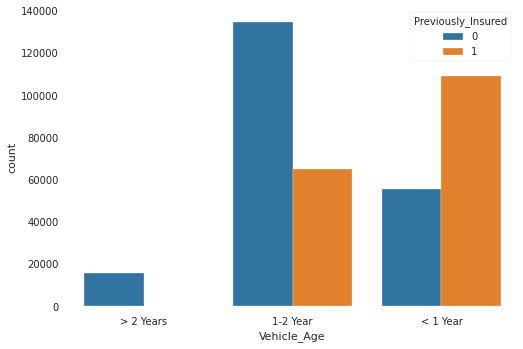

In [ ]:
#previously_insured vs vechicle age
sns.countplot(df.Vehicle_Age,hue=df.Previously_Insured)

Observation-

The graph shows that vehicles older than two years did not previously have insurance. The majority of vehicles with an age of 1-2 years had never been insured. The majority of vehicles that are less than a year old have previously been insured.


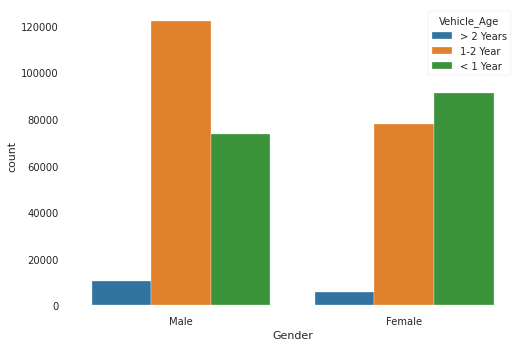

In [ ]:
#gendervs vechicle age
sns.countplot(df.Gender, hue=df.Vehicle_Age	)

Observation-

We can see from the graph that Male customers own more cars in the age ranges of >2 and 1-2. Female customers own more cars in the age range of < 1.

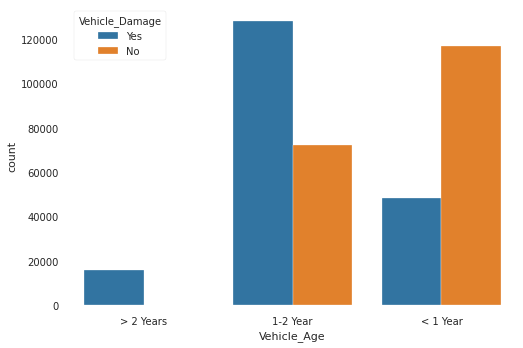

In [ ]:
#vehicle age vs vehicle damage
sns.countplot(df.Vehicle_Age, hue=df.Vehicle_Damage	)

Observation-

According to the graph, as vehicle age increases, so does the likelihood of vehicle damage.

In [ ]:
abc=df.groupby('Gender')['Annual_Premium'].mean()
abc

Gender
Female    30495.787990
Male      30622.649122
Name: Annual_Premium, dtype: float64

Observation-

The average premium paid by both men and women is nearly the same.



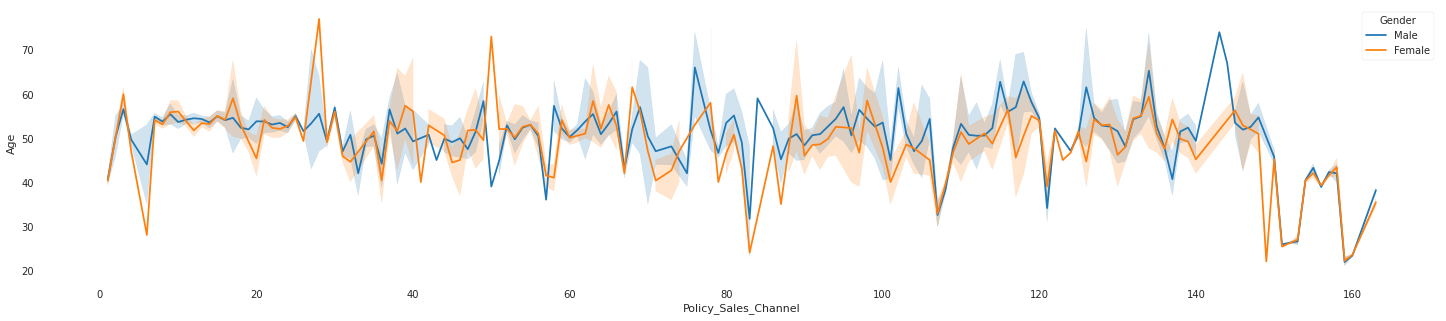

In [ ]:
#checking policy sales channel values count
size=plt.figure(figsize=(25,5))
sns.lineplot(df.Policy_Sales_Channel,df.Age,hue=df.Gender)

Observation-

According to the graph above, the majority of young age customers are contacted by policy sales channels 145 to 163.

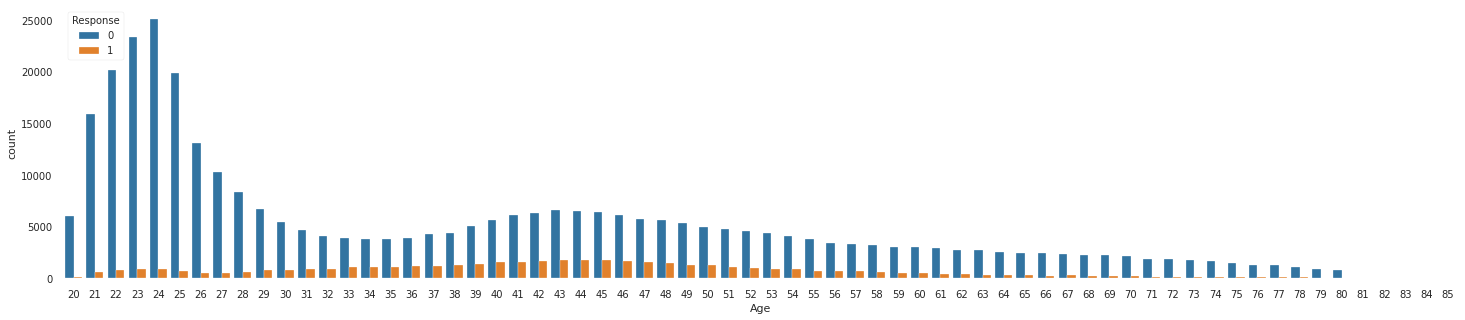

In [ ]:
#age vs response
size=plt.figure(figsize=(25,5))
sns.countplot(df.Age,hue=df.Response)

Observation-

From the we can observe customer with age range 20 to 30 high chances of rejecting vehicle insurance and customer age range 30 t0 50 accepted more  vehicle insurance compare other age

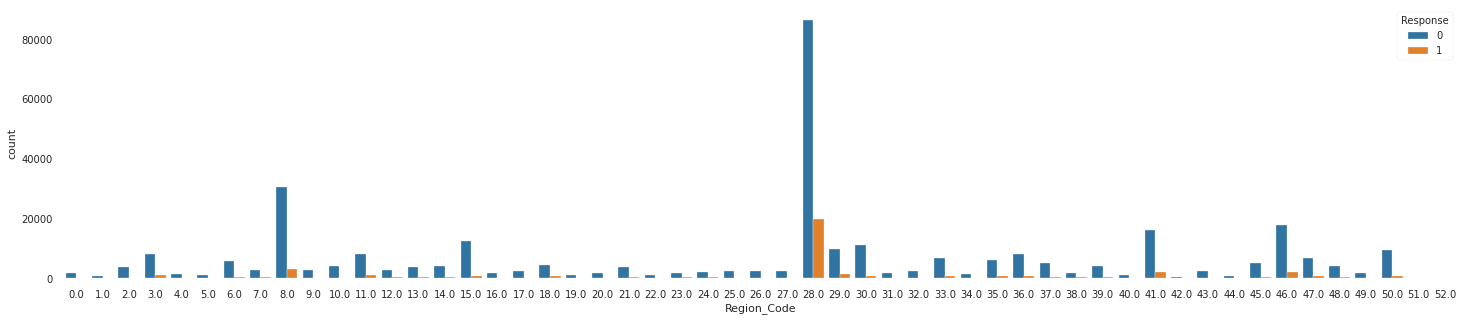

In [ ]:
#region code vs response
size=plt.figure(figsize=(25,5))
sns.countplot(df.Region_Code,hue=df.Response)

Observation-

According to the graph, Region code 28 has a higher number of both accepting and rejecting insurance.

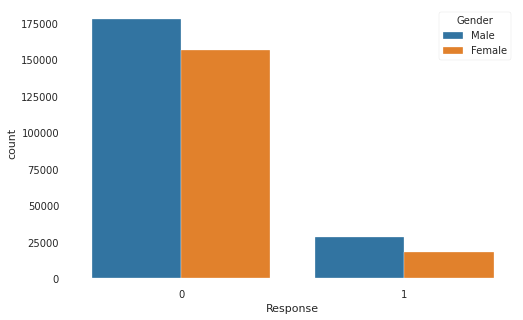

In [ ]:
#gender vs response
size=plt.figure(figsize=(8,5))
sns.countplot(df.Response,hue=df.Gender)

Observation-

From the above graph we can observe majority of accepting insurance is mens

# Feature engineering

### Checking duplicate values

In [ ]:
len(df[df.duplicated()])

0

Observation

There are no duplicates in our dataset

### checking null values

In [ ]:
#Checking null values
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [ ]:
#importing library
import missingno as msno

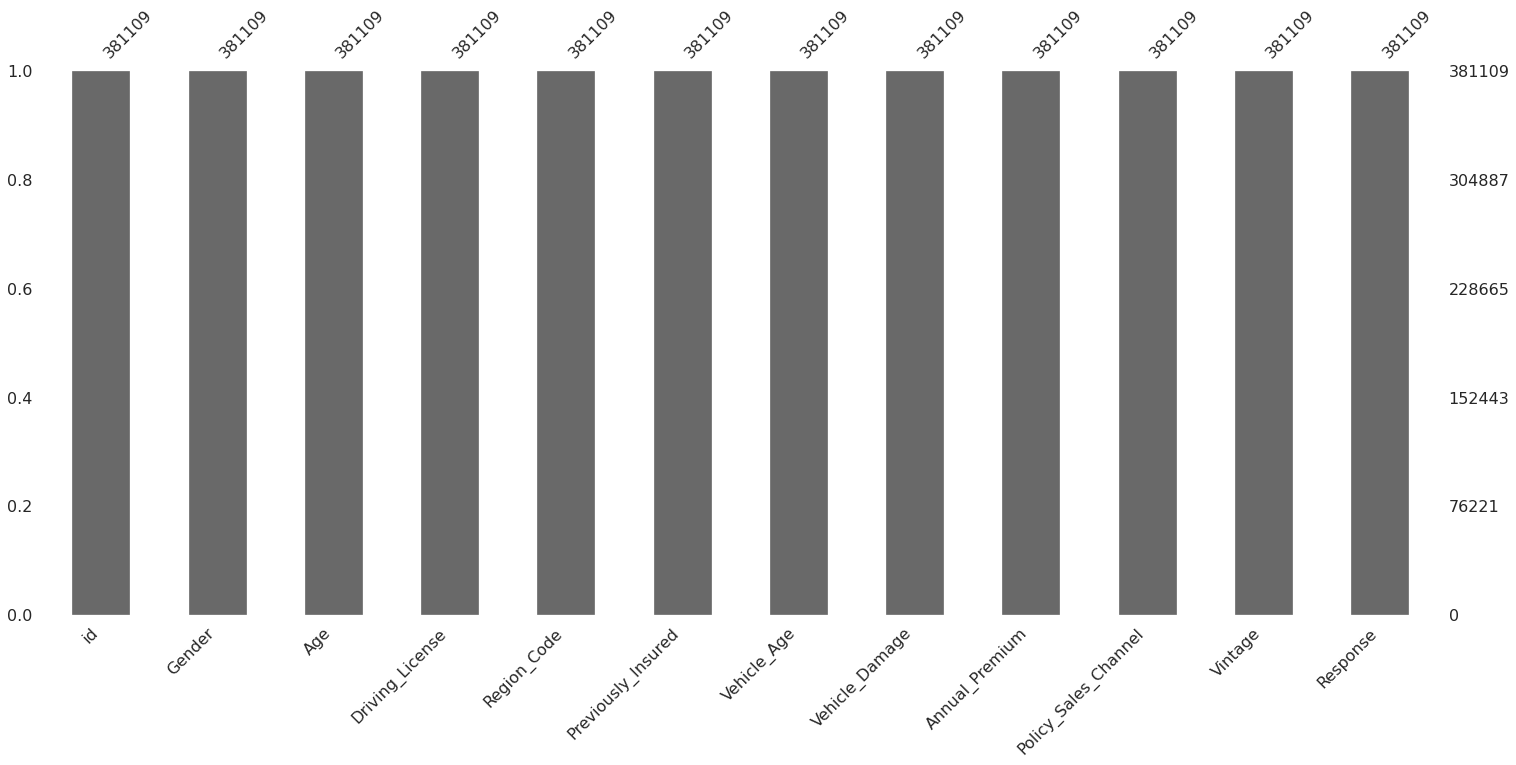

In [ ]:
msno.bar(df)

Observation-

There is no null values in our dataset

### checking outliers

In [ ]:
#checking the outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

Age                         0
Annual_Premium          10320
Driving_License           812
Gender                      0
Policy_Sales_Channel        0
Previously_Insured          0
Region_Code                 0
Response                46710
Vehicle_Age                 0
Vehicle_Damage              0
Vintage                     0
id                          0
dtype: int64

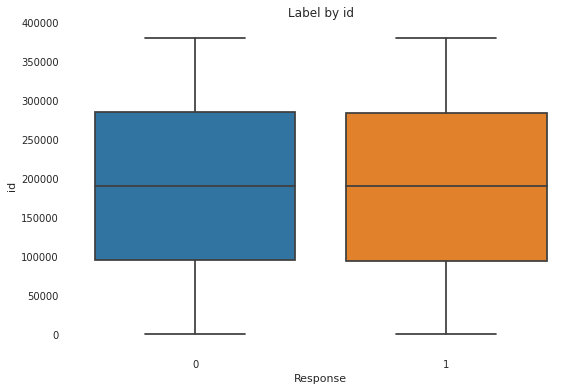

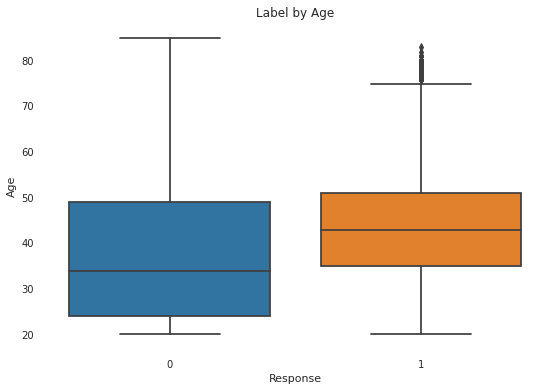

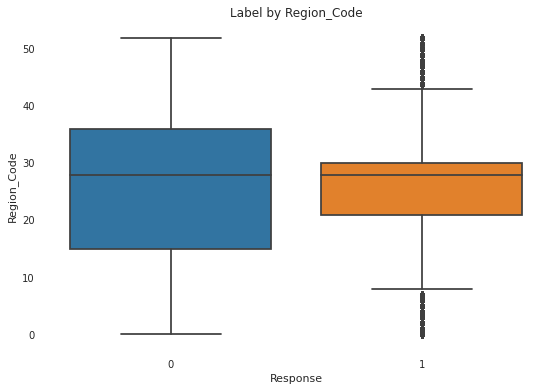

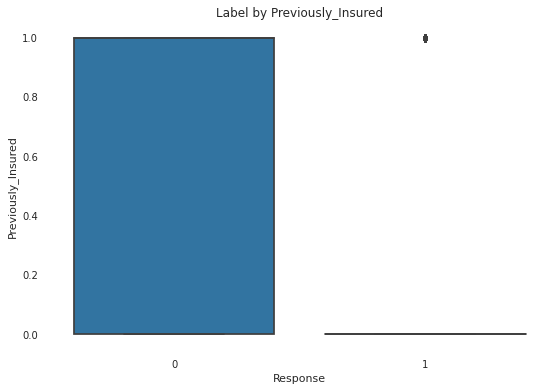

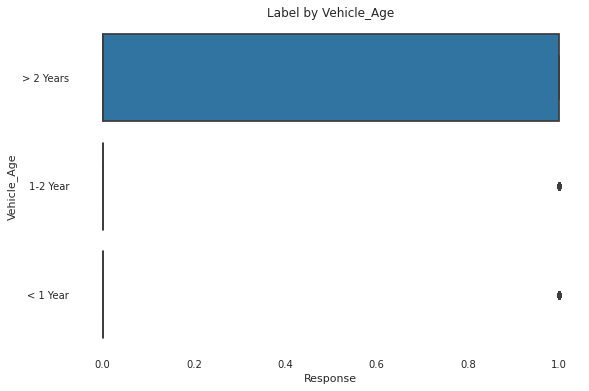

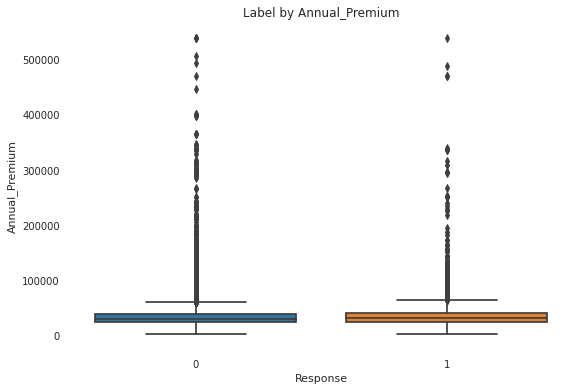

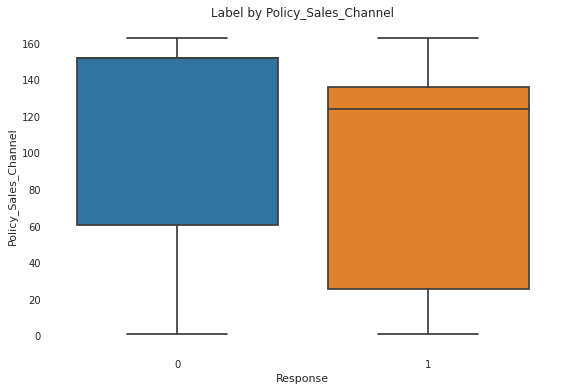

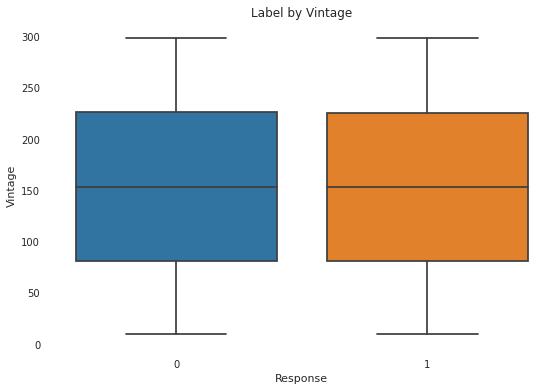

In [ ]:
#Plot a boxplot for the label by each column
for col in df.columns:
  if(col not in ['Response','Gender','Driving_License','Vehicle_Damage']):
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    sns.boxplot(df['Response'], df[col], ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel(col)
plt.show()

Observation-

2.5% of Annual_Premium data are outliers 

### Encoding categorical features

In [ ]:
df.head()

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1    Male   44                1         28.0                   0   
1   2    Male   76                1          3.0                   0   
2   3    Male   47                1         28.0                   0   
3   4    Male   21                1         11.0                   1   
4   5  Female   29                1         41.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0   > 2 Years            Yes         40454.0                  26.0      217   
1    1-2 Year             No         33536.0                  26.0      183   
2   > 2 Years            Yes         38294.0                  26.0       27   
3    < 1 Year             No         28619.0                 152.0      203   
4    < 1 Year             No         27496.0                 152.0       39   

   Response  smoker  
0         1       2  
1         0       0  
2         1       2  
3         0       1  
4         0       1

In [ ]:
#encoding ordinal dataset
df['Vehicle_Age']= df['Vehicle_Age'].map({'> 2 Years':2,'1-2 Year':1,'< 1 Year':0})
df['Vehicle_Damage']=df['Vehicle_Damage'].map({'Yes':1,'No':0})

In [ ]:
#one hot encoding on Gender
enc=OneHotEncoder()
enc_data=pd.DataFrame(enc.fit_transform(df[['Gender']]).toarray())
names=enc.get_feature_names_out()
enc_data.columns=names
df1=df.join(enc_data)

In [ ]:
df1.head()

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1    Male   44                1         28.0                   0   
1   2    Male   76                1          3.0                   0   
2   3    Male   47                1         28.0                   0   
3   4    Male   21                1         11.0                   1   
4   5  Female   29                1         41.0                   1   

   Vehicle_Age  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0            2               1         40454.0                  26.0      217   
1            1               0         33536.0                  26.0      183   
2            2               1         38294.0                  26.0       27   
3            0               0         28619.0                 152.0      203   
4            0               0         27496.0                 152.0       39   

   Response  Gender_Female  Gender_Male  
0         1            0.0          1.0  
1         0            0.0          1.0  
2         1            0.0          1.0  
3         0            0.0          1.0  
4         0            1.0          0.0

In [ ]:
#removing Gender feature
df1.drop('Gender',axis=1,inplace=True)

In [ ]:
#shape of dataset
df1.shape

(381109, 13)

# Feature selection

In [ ]:
#droping id column its having 100% unique values
df1.drop('id',axis=1,inplace=True)

### Varience Threshold Removal
using this method we can check which columns have constant values.

In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
#implemention variancethreshold
variance_threshold=VarianceThreshold(threshold=0)
variance_threshold.fit(df1)
variance_threshold.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

Observation-

here there is no column in our data set having constant values 

### Feature selection for numerical features using f_classification

In [ ]:
#importing the libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [ ]:
X=df1.drop('Response',axis=1)
Y=df1.Response

In [ ]:
#finding the f scores of each features
f_scores = f_classif(X, Y)
f_scores

(array([4.76694479e+03, 3.93066928e+01, 4.25827356e+01, 5.02033540e+04,
        1.97325562e+04, 5.47422454e+04, 1.94317587e+02, 7.51301151e+03,
        4.20468707e-01, 1.05091307e+03, 1.05091307e+03]),
 array([0.00000000e+000, 3.62583444e-010, 6.78391651e-011, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 3.72231514e-044, 0.00000000e+000,
        5.16703652e-001, 3.18074235e-230, 3.18074235e-230]))

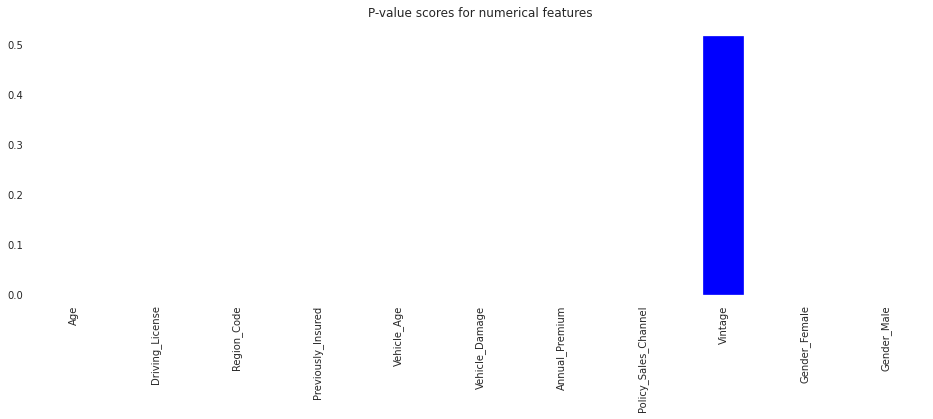

In [ ]:
#The second array consists of p-values that we need.
p_values= pd.Series(f_scores[1],index= X.columns)
p_values.plot(kind='bar',color='blue',figsize=(16,5))
plt.title('P-value scores for numerical features')
plt.show()

### Correlation feature selection

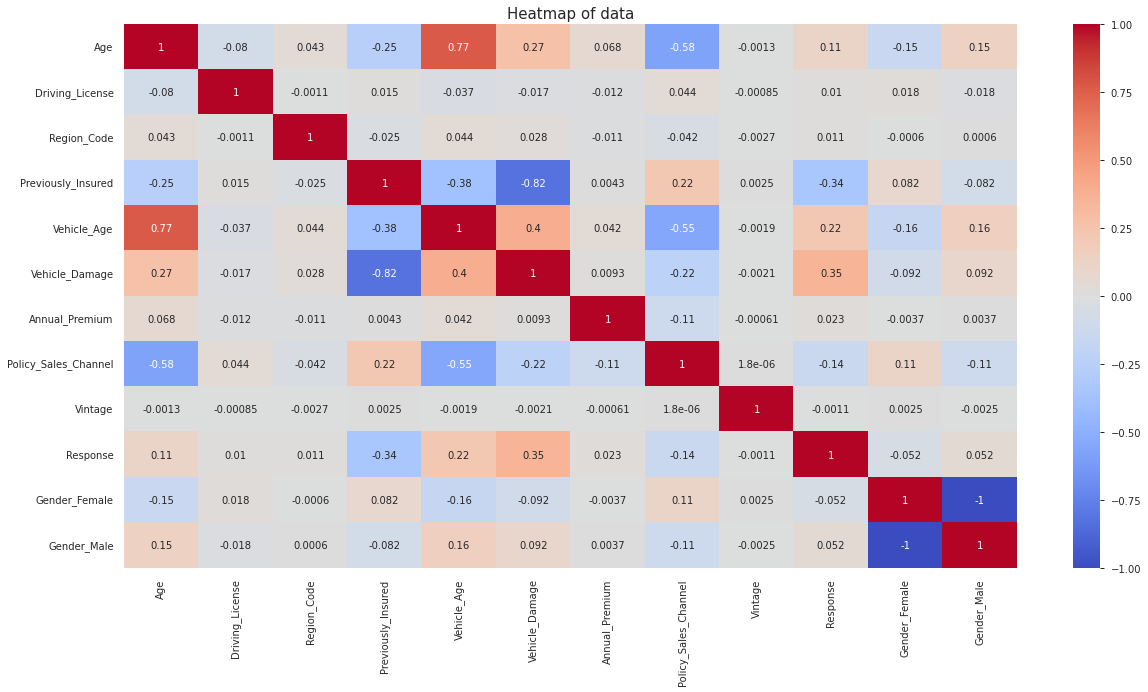

In [ ]:
#checking correlation with all columns using heat map
corrmat = df1.corr()
plt.rcParams["figure.figsize"] = (20,10)
sns.heatmap(corrmat, vmin=-1,annot = True,cmap='coolwarm')
plt.title("Heatmap of data",fontsize= 15)
plt.show()

Observations based on correlation plot:-

*  Gender_female and male 100% Multicollinearity we can remove any one feature among these 2
*  Previously insured, vehicle_age and vechicle_damage have high correlations with dependent variable
*  Vintage has verly less negative correlation with dependent variable

In [ ]:
#droping gender female
df1.drop('Gender_Female',axis=1,inplace=True)

In [ ]:
df1.shape

(381109, 11)

### Checking Multicollinearity 

In [183]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [184]:
calc_vif(df1[[i for i in df1.describe().columns if i not in ['Response']]]).sort_values(by='VIF',ascending=False)

variables        VIF
1       Driving_License  42.854887
0                   Age  18.435567
7  Policy_Sales_Channel   8.077809
5        Vehicle_Damage   6.358073
4           Vehicle_Age   6.029913
3    Previously_Insured   5.727179
2           Region_Code   4.956289
8               Vintage   4.373772
6        Annual_Premium   4.182069
9           Gender_Male   2.236267

# Test and train split

In [185]:
X=df1.drop('Response',axis=1)
Y=df1.Response

In [186]:
#spliting train and test
X_train1, X_test1, y_train, y_test = train_test_split( X,Y, test_size = 0.3, random_state = 10) 
print(X_train1.shape)
print(X_test1.shape)

(266776, 10)
(114333, 10)


### minmax scaler for scaling down data

In [189]:
# Transforming data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train1)
X_test = scaler.transform(X_test1)